# Superposed Epoch Analysis 20CR netcdfs
- opens all the 20CR files with data on precipitation pr and surface temperature tas
- calculates monthly anomalies (based on 5-yr climatology) for 4 spatial regions (global, SH, Aus, E Aus) and 5 eruptions
- calculates percentiles (10, 90) to show model spread
- superposes the time-series for 5 eruptions plus mmm for tmp and pr and different regions (superposed epoch analysis)

In [2]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import seaborn as sns
import dask.diagnostics # dask allows you to check how long something is taking to load
import scipy

In [3]:
# import custom functions
import sys 
# sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook
sys.path.append('/g/data/w48/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

In [4]:
path = '/g/data/w48/kb6999/Reanalysis/20CR_SEA_data_for_plots/'
var = 'tmp'
# var = 'pr'

# don't need to run these next few cells, start instead from next section (open netcdfs)

In [4]:
# open all krakatoa eruption files/
K_llm_Glob = xr.open_dataset(f'{path}K_llm_Glob_{var}.nc')
K_llm_SH = xr.open_dataset(f'{path}K_llm_SH_{var}.nc')
K_llm_Aus = xr.open_dataset(f'{path}K_llm_Aus_{var}.nc')
K_llm_EA = xr.open_dataset(f'{path}K_llm_EA_{var}.nc')

In [27]:
# open all santa maria eruption files/
S_llm_Glob = xr.open_dataset(f'{path}S_llm_Glob_{var}.nc')
S_llm_SH = xr.open_dataset(f'{path}S_llm_SH_{var}.nc')
S_llm_Aus = xr.open_dataset(f'{path}S_llm_Aus_{var}.nc')
S_llm_EA = xr.open_dataset(f'{path}S_llm_EA_{var}.nc')

In [28]:
# open all agung eruption files/
A_llm_Glob = xr.open_dataset(f'{path}A_llm_Glob_{var}.nc')
A_llm_SH = xr.open_dataset(f'{path}A_llm_SH_{var}.nc')
A_llm_Aus = xr.open_dataset(f'{path}A_llm_Aus_{var}.nc')
A_llm_EA = xr.open_dataset(f'{path}A_llm_EA_{var}.nc')

In [29]:
# open all el chicon eruption files/
E_llm_Glob = xr.open_dataset(f'{path}E_llm_Glob_{var}.nc')
E_llm_SH = xr.open_dataset(f'{path}E_llm_SH_{var}.nc')
E_llm_Aus = xr.open_dataset(f'{path}E_llm_Aus_{var}.nc')
E_llm_EA = xr.open_dataset(f'{path}E_llm_EA_{var}.nc')

In [30]:
# open all pinatubo eruption files/
P_llm_Glob = xr.open_dataset(f'{path}P_llm_Glob_{var}.nc')
P_llm_SH = xr.open_dataset(f'{path}P_llm_SH_{var}.nc')
P_llm_Aus = xr.open_dataset(f'{path}P_llm_Aus_{var}.nc')
P_llm_EA = xr.open_dataset(f'{path}P_llm_EA_{var}.nc')

In [31]:
# eruption names
volcanoes = ['Krakatoa', 'Santa Maria','Agung','El Chichon', 'Pinatubo']

In [13]:
volcanoes4 = ['Krakatoa', 'Santa Maria','Agung','El Chichon']

In [10]:
def combine4(K,S,A,E,names):
    """ Reset the time axis for data used in the superposed epoch analysis  
        
        Args:
        K (xarray): data set of first eruption 
        S (xarray): data set of second eruption 
        A (xarray): data set of third eruption 
        E (xarray): data set of fourth eruption 
        names (dict): dictionary of names for each of the five eruptions
    """
    import numpy as np
    import xarray as xr
    ds=[]
    ds.append(K)
    ds.append(S)
    ds.append(A)
    ds.append(E)

    # store all eruptions in an array
    composite = xr.concat(ds, dim='volcano', coords = 'minimal')
    composite.coords['volcano'] = names
    
    return composite

In [14]:
# combine pr files as composite
if var == 'pr':
    composite_llm_Glob_pr = combine4(K_llm_Glob, S_llm_Glob, A_llm_Glob, E_llm_Glob, volcanoes4)
    composite_llm_SH_pr = combine4(K_llm_SH, S_llm_SH, A_llm_SH, E_llm_SH, volcanoes4)
    composite_llm_Aus_pr = combine4(K_llm_Aus, S_llm_Aus, A_llm_Aus, E_llm_Aus, volcanoes4)
    composite_llm_EA_pr = combine4(K_llm_EA, S_llm_EA, A_llm_EA, E_llm_EA, volcanoes4)
    print('var is pr')

var is pr


In [10]:
def combine(K,S,A,E,P,names):
    """ Reset the time axis for data used in the superposed epoch analysis  
        
        Args:
        K (xarray): data set of first eruption 
        S (xarray): data set of second eruption 
        A (xarray): data set of third eruption 
        E (xarray): data set of fourth eruption 
        P (xarray): data set of fifth eruption 
        names (dict): dictionary of names for each of the five eruptions
    """
    import numpy as np
    import xarray as xr
    ds=[]
    ds.append(K)
    ds.append(S)
    ds.append(A)
    ds.append(E)
    ds.append(P)

    # store all eruptions in an array
    composite = xr.concat(ds, dim='volcano', coords = 'minimal')
    composite.coords['volcano'] = names
    
    return composite

### tas

In [32]:
# combine tas files as composite
if var =='tmp':
    composite_llm_Glob_tmp = combine(K_llm_Glob, S_llm_Glob, A_llm_Glob, E_llm_Glob, P_llm_Glob, volcanoes)
    composite_llm_SH_tmp = combine(K_llm_SH, S_llm_SH, A_llm_SH, E_llm_SH, P_llm_SH, volcanoes)
    composite_llm_Aus_tmp = combine(K_llm_Aus, S_llm_Aus, A_llm_Aus, E_llm_Aus, P_llm_Aus, volcanoes)
    composite_llm_EA_tmp = combine(K_llm_EA, S_llm_EA, A_llm_EA, E_llm_EA, P_llm_EA, volcanoes)
    print('var is tmp')

var is tmp


In [33]:
composite_llm_EA_tmp

<xarray.Dataset>
Dimensions:  (member: 79, time: 121, volcano: 5)
Coordinates:
  * time     (time) int64 -60 -59 -58 -57 -56 -55 -54 ... 54 55 56 57 58 59 60
  * member   (member) int64 1 2 3 4 5 6 7 8 9 10 ... 72 73 74 75 76 77 78 79 80
  * volcano  (volcano) <U11 'Krakatoa' 'Santa Maria' ... 'El Chichon' 'Pinatubo'
Data variables:
    tmp      (volcano, member, time) float32 0.1348 0.2752 ... -0.03082 1.216

### pr

In [20]:
# combine pr files as composite
if var == 'pr':
    composite_llm_Glob_pr = combine(K_llm_Glob, S_llm_Glob, A_llm_Glob, E_llm_Glob, P_llm_Glob, volcanoes)
    composite_llm_SH_pr = combine(K_llm_SH, S_llm_SH, A_llm_SH, E_llm_SH, P_llm_SH, volcanoes)
    composite_llm_Aus_pr = combine(K_llm_Aus, S_llm_Aus, A_llm_Aus, E_llm_Aus, P_llm_Aus, volcanoes)
    composite_llm_EA_pr = combine(K_llm_EA, S_llm_EA, A_llm_EA, E_llm_EA, P_llm_EA, volcanoes)
    print('var is pr')

var is pr


In [34]:
# combine tas and pr 
composite_llm_Glob = xr.Dataset({'tmp': composite_llm_Glob_tmp.tmp, 'pr': composite_llm_Glob_pr.pr*86400})
composite_llm_SH = xr.Dataset({'tmp': composite_llm_SH_tmp.tmp, 'pr': composite_llm_SH_pr.pr*86400})
composite_llm_Aus = xr.Dataset({'tmp': composite_llm_Aus_tmp.tmp, 'pr': composite_llm_Aus_pr.pr*86400})
composite_llm_EA = xr.Dataset({'tmp': composite_llm_EA_tmp.tmp, 'pr': composite_llm_EA_pr.pr*86400})

In [35]:
# save composite off as a netcdf if it will let me so i don't have to reload it each time
composite_llm_Glob.to_netcdf(f'{path}_composite_llm_Glob.nc')
composite_llm_SH.to_netcdf(f'{path}_composite_llm_SH.nc')
composite_llm_Aus.to_netcdf(f'{path}_composite_llm_Aus.nc')
composite_llm_EA.to_netcdf(f'{path}_composite_llm_EA.nc')

# START HERE

In [5]:
composite_llm_Glob = xr.open_dataset(f'{path}_composite_llm_Glob.nc')
composite_llm_SH = xr.open_dataset(f'{path}_composite_llm_SH.nc')
composite_llm_Aus = xr.open_dataset(f'{path}_composite_llm_Aus.nc')
composite_llm_EA = xr.open_dataset(f'{path}_composite_llm_EA.nc')

Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  
## Select out regions and eruption dates

In [6]:
# take the multi member mean
composite_mmm_Glob = composite_llm_Glob.mean(dim='member')
composite_mmm_SH = composite_llm_SH.mean(dim='member')
composite_mmm_Aus = composite_llm_Aus.mean(dim='member')
composite_mmm_EA = composite_llm_EA.mean(dim='member')

In [7]:
# rolling mean
composite_mmm_Glob_roll12 = composite_mmm_Glob.rolling(time=12).mean()
composite_mmm_SH_roll12 = composite_mmm_SH.rolling(time=12).mean()
composite_mmm_Aus_roll12 = composite_mmm_Aus.rolling(time=12).mean()
composite_mmm_EA_roll12 = composite_mmm_EA.rolling(time=12).mean()

In [8]:
# take the composite over all volcanoes
V_composite_mmm_Glob = composite_mmm_Glob.mean(dim='volcano')
V_composite_mmm_SH = composite_mmm_SH.mean(dim='volcano')
V_composite_mmm_Aus = composite_mmm_Aus.mean(dim='volcano')
V_composite_mmm_EA = composite_mmm_EA.mean(dim='volcano')

In [9]:
# rolling mean
V_composite_mmm_Glob_roll12 = V_composite_mmm_Glob.rolling(time=12).mean()
V_composite_mmm_SH_roll12 = V_composite_mmm_SH.rolling(time=12).mean()
V_composite_mmm_Aus_roll12 = V_composite_mmm_Aus.rolling(time=12).mean()
V_composite_mmm_EA_roll12 = V_composite_mmm_EA.rolling(time=12).mean()

In [10]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
p10_Glob = composite_llm_Glob.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])
p10_SH = composite_llm_SH.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])
p10_Aus = composite_llm_Aus.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])
p10_EA = composite_llm_Aus.chunk({'member': -1,'volcano': -1}).quantile(0.1, dim=['member', 'volcano'])

p90_Glob = composite_llm_Glob.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])
p90_SH = composite_llm_SH.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])
p90_Aus = composite_llm_Aus.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])
p90_EA = composite_llm_EA.chunk({'member': -1,'volcano': -1}).quantile(0.9, dim=['member', 'volcano'])

In [11]:
# rolling mean
p10_Glob_roll12 = p10_Glob.rolling(time=12).mean()
p10_SH_roll12 = p10_SH.rolling(time=12).mean()
p10_Aus_roll12 = p10_Aus.rolling(time=12).mean()
p10_EA_roll12 = p10_EA.rolling(time=12).mean()

p90_Glob_roll12 = p90_Glob.rolling(time=12).mean()
p90_SH_roll12 = p90_SH.rolling(time=12).mean()
p90_Aus_roll12 = p90_Aus.rolling(time=12).mean()
p90_EA_roll12 = p90_EA.rolling(time=12).mean()

In [12]:
p90_EA

<xarray.Dataset>
Dimensions:   (time: 121)
Coordinates:
  * time      (time) int64 -60 -59 -58 -57 -56 -55 -54 ... 54 55 56 57 58 59 60
    quantile  float64 0.9
Data variables:
    tmp       (time) float64 dask.array<chunksize=(121,), meta=np.ndarray>
    pr        (time) float64 dask.array<chunksize=(121,), meta=np.ndarray>

### significance std

In [15]:
# define array with region name, and then corresponding time series 
regions = ['Glob','SH','Aus','EA']
# composite signal 
time_series_pr = [V_composite_mmm_Glob_roll12.pr, V_composite_mmm_SH_roll12.pr, V_composite_mmm_Aus_roll12.pr, V_composite_mmm_EA_roll12.pr]
time_series_tmp = [V_composite_mmm_Glob_roll12.tmp, V_composite_mmm_SH_roll12.tmp, V_composite_mmm_Aus_roll12.tmp, V_composite_mmm_EA_roll12.tmp]

data_pr = {r: d for r, d in zip(regions, time_series_pr)}
data_tmp = {r: d for r, d in zip(regions, time_series_tmp)}

In [16]:
# calculate and print statistical significance of 2 standard deviations
func.sig_2std_vals(data_pr, var='precipitation', dates=[-60,-3])
func.sig_2std_vals(data_tmp, var='temperature', dates=[-60,-3])

Significance of 2 standard deviations of precipitation signal on each spatial scale is:
Glob: 0.003 mm/day
SH: 0.007 mm/day
Aus: 0.077 mm/day
EA: 0.103 mm/day
Significance of 2 standard deviations of temperature signal on each spatial scale is:
Glob: 0.04 °C
SH: 0.03 °C
Aus: 0.12 °C
EA: 0.18 °C


In [21]:
func=reload(func)

### maximum

In [25]:
# define array with region name, and then corresponding time series 
regions = ['Aus','EA']
# composite signal 
time_series_pr = [V_composite_mmm_Aus_roll12.pr.sel(time=slice(0,36)), V_composite_mmm_EA_roll12.pr.sel(time=slice(0,36))]

data_pr = {r: d for r, d in zip(regions, time_series_pr)}

print('composite')
func.max_vals_sea(data_pr, var='precipitation')


composite
Maximum value of precipitation signal on each spatial scale is:
Aus: 0.118 mm/day 21 months post-eruption
EA: 0.085 mm/day 21 months post-eruption


### significance for krakatoa 

In [19]:
# composite signal 
time_series_pr = [composite_mmm_Glob_roll12.sel(volcano='Krakatoa').pr, 
                  composite_mmm_SH_roll12.sel(volcano='Krakatoa').pr, 
                  composite_mmm_Aus_roll12.sel(volcano='Krakatoa').pr, 
                  composite_mmm_EA_roll12.sel(volcano='Krakatoa').pr]
time_series_tmp = [composite_mmm_Glob_roll12.sel(volcano='Krakatoa').tmp, 
                   composite_mmm_SH_roll12.sel(volcano='Krakatoa').tmp, 
                   composite_mmm_Aus_roll12.sel(volcano='Krakatoa').tmp, 
                   composite_mmm_EA_roll12.sel(volcano='Krakatoa').tmp]

K_data_pr = {r: d for r, d in zip(regions, time_series_pr)}
K_data_tmp = {r: d for r, d in zip(regions, time_series_tmp)}

In [20]:
# calculate and print statistical significance of 2 standard deviations
func.sig_2std_vals(K_data_pr, var='precipitation', dates=[-60,-3])
func.sig_2std_vals(K_data_tmp, var='temperature', dates=[-60,-3])

Significance of 2 standard deviations of precipitation signal on each spatial scale is:
Glob: 0.011 mm/day
SH: 0.033 mm/day
Aus: 0.33 mm/day
EA: 0.394 mm/day
Significance of 2 standard deviations of temperature signal on each spatial scale is:
Glob: 0.06 °C
SH: 0.02 °C
Aus: 0.27 °C
EA: 0.22 °C


### maximum

In [26]:
# define array with region name, and then corresponding time series 
regions = ['Aus','EA']
# composite signal 
time_series_pr = [composite_mmm_Glob_roll12.sel(volcano='Krakatoa').pr.sel(time=slice(0,36)), 
                  composite_mmm_Glob_roll12.sel(volcano='Krakatoa').pr.sel(time=slice(0,36))]

data_pr = {r: d for r, d in zip(regions, time_series_pr)}

print('krakatoa')
func.max_vals_sea(data_pr, var='precipitation')

krakatoa
Maximum value of precipitation signal on each spatial scale is:
Aus: -0.017 mm/day 0 months post-eruption
EA: -0.017 mm/day 0 months post-eruption


### minimum

In [44]:
# calculate the minimum value of the mmm for each spatial region
composite_min_mmm_Glob = V_composite_mmm_Glob_roll12.min()
composite_min_mmm_SH = V_composite_mmm_SH_roll12.min()
composite_min_mmm_Aus = V_composite_mmm_Aus_roll12.min()
composite_min_mmm_EA = V_composite_mmm_EA_roll12.min()

In [45]:
# find the date the minimum occurred
min_date_Glob_tmp = func.min_date_sea(V_composite_mmm_Glob_roll12.tmp, composite_min_mmm_Glob.tmp)
min_date_SH_tmp = func.min_date_sea(V_composite_mmm_SH_roll12.tmp, composite_min_mmm_SH.tmp)
min_date_Aus_tmp = func.min_date_sea(V_composite_mmm_Aus_roll12.tmp, composite_min_mmm_Aus.tmp)
min_date_EA_tmp = func.min_date_sea(V_composite_mmm_EA_roll12.tmp, composite_min_mmm_EA.tmp)

In [46]:
min_date_Glob_pr = func.min_date_sea(V_composite_mmm_Glob_roll12.pr, composite_min_mmm_Glob.pr)
min_date_SH_pr = func.min_date_sea(V_composite_mmm_SH_roll12.pr, composite_min_mmm_SH.pr)
min_date_Aus_pr = func.min_date_sea(V_composite_mmm_Aus_roll12.pr, composite_min_mmm_Aus.pr)
min_date_EA_pr = func.min_date_sea(V_composite_mmm_EA_roll12.pr, composite_min_mmm_EA.pr)

In [49]:
# print minimum values for composite as calculated above
print('Minimum value of composite temperature signal on each spatial scale is:\n Global:', 
      composite_min_mmm_Glob.tmp.values.round(decimals=2), f'at {min_date_Glob_tmp.data} months post-eruption', '\n SH:', 
      composite_min_mmm_SH.tmp.values.round(decimals=2), f'at {min_date_SH_tmp.data} months post-eruption', '\n Aus:', 
      composite_min_mmm_Aus.tmp.values.round(decimals=2), f'at {min_date_Aus_tmp.data} months post-eruption', '\n EA:', 
      composite_min_mmm_EA.tmp.values.round(decimals=2), f'at {min_date_EA_tmp.data} months post-eruption')
print('Minimum value of composite precipitation signal on each spatial scale is:\n Global:', 
      composite_min_mmm_Glob.pr.values.round(decimals=2), f'at {min_date_Glob_pr.data} months post-eruption', '\n SH:', 
      composite_min_mmm_SH.pr.values.round(decimals=2), f'at {min_date_SH_pr.data} months post-eruption', '\n Aus:', 
      composite_min_mmm_Aus.pr.values.round(decimals=2), f'at {min_date_Aus_pr.data} months post-eruption', '\n EA:', 
      composite_min_mmm_EA.pr.values.round(decimals=2), f'at {min_date_EA_pr.data} months post-eruption')

Minimum value of composite temperature signal on each spatial scale is:
 Global: -0.14 at 23 months post-eruption 
 SH: -0.1 at 26 months post-eruption 
 Aus: -0.36 at 22 months post-eruption 
 EA: -0.3 at 22 months post-eruption
Minimum value of composite precipitation signal on each spatial scale is:
 Global: -0.02 at 29 months post-eruption 
 SH: -0.02 at 38 months post-eruption 
 Aus: -0.09 at 11 months post-eruption 
 EA: -0.14 at 9 months post-eruption


In [50]:
# calculate the minimum value for Krakatoa in each spatial region
K_min_mmm_Glob = composite_mmm_Glob_roll12.sel(volcano='Krakatoa').min()
K_min_mmm_SH = composite_mmm_SH_roll12.sel(volcano='Krakatoa').min()
K_min_mmm_Aus = composite_mmm_Aus_roll12.sel(volcano='Krakatoa').min()
K_min_mmm_EA = composite_mmm_EA_roll12.sel(volcano='Krakatoa').min()

In [51]:
# find the date the minimum occurred
K_min_date_Glob_tmp = func.min_date_sea(composite_mmm_Glob_roll12.sel(volcano='Krakatoa').tmp, K_min_mmm_Glob.tmp)
K_min_date_SH_tmp = func.min_date_sea(composite_mmm_SH_roll12.sel(volcano='Krakatoa').tmp, K_min_mmm_SH.tmp)
K_min_date_Aus_tmp = func.min_date_sea(composite_mmm_Aus_roll12.sel(volcano='Krakatoa').tmp, K_min_mmm_Aus.tmp)
K_min_date_EA_tmp = func.min_date_sea(composite_mmm_EA_roll12.sel(volcano='Krakatoa').tmp, K_min_mmm_EA.tmp)


In [53]:
K_min_date_Glob_pr = func.min_date_sea(composite_mmm_Glob_roll12.sel(volcano='Krakatoa').pr, K_min_mmm_Glob.pr)
K_min_date_SH_pr = func.min_date_sea(composite_mmm_SH_roll12.sel(volcano='Krakatoa').pr, K_min_mmm_SH.pr)
K_min_date_Aus_pr = func.min_date_sea(composite_mmm_Aus_roll12.sel(volcano='Krakatoa').pr, K_min_mmm_Aus.pr)
K_min_date_EA_pr = func.min_date_sea(composite_mmm_EA_roll12.sel(volcano='Krakatoa').pr, K_min_mmm_EA.pr)

In [54]:
# print minimum values for Krakatoa as calculated above
print('Minimum value of Krakatoa temperature signal on each spatial scale is:\n Global:', 
      K_min_mmm_Glob.tmp.values.round(decimals=2), f'{K_min_date_Glob_tmp.data} months post-eruption', '\n SH:', 
      K_min_mmm_SH.tmp.values.round(decimals=2), f'{K_min_date_SH_tmp.data} months post-eruption', '\n Aus:', 
      K_min_mmm_Aus.tmp.values.round(decimals=2), f'{K_min_date_Aus_tmp.data} months post-eruption', '\n EA:', 
      K_min_mmm_EA.tmp.values.round(decimals=2), f'{K_min_date_EA_tmp.data} months post-eruption')
print('Minimum value of Krakatoa precipitation signal on each spatial scale is:\n Global:', 
      K_min_mmm_Glob.pr.values.round(decimals=2), f'{K_min_date_Glob_pr.data} months post-eruption', '\n SH:', 
      K_min_mmm_SH.pr.values.round(decimals=2), f'{K_min_date_SH_pr.data} months post-eruption', '\n Aus:', 
      K_min_mmm_Aus.pr.values.round(decimals=2), f'{K_min_date_Aus_pr.data} months post-eruption', '\n EA:', 
      K_min_mmm_EA.pr.values.round(decimals=2), f'{K_min_date_EA_pr.data} months post-eruption')

Minimum value of Krakatoa temperature signal on each spatial scale is:
 Global: -0.18 22 months post-eruption 
 SH: -0.16 51 months post-eruption 
 Aus: -0.79 49 months post-eruption 
 EA: -0.51 49 months post-eruption
Minimum value of Krakatoa precipitation signal on each spatial scale is:
 Global: -0.04 23 months post-eruption 
 SH: -0.07 56 months post-eruption 
 Aus: -0.26 6 months post-eruption 
 EA: -0.26 6 months post-eruption


### 6 month values for table

In [27]:
V_composite_mmm_Glob.sel(time=[0,6,12,18,24,30,36])

<xarray.Dataset>
Dimensions:  (time: 7)
Coordinates:
  * time     (time) int64 0 6 12 18 24 30 36
Data variables:
    tmp      (time) float32 -0.08391 -0.01999 -0.1349 ... -0.1032 -0.03631
    pr       (time) float64 -0.01282 -0.01871 0.00112 ... -0.007232 0.009361

# Figures

In [21]:
# set the default font size
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [22]:
# blues = sns.color_palette("Blues_r")
# greens = sns.color_palette("Greens_r")
# reds = sns.color_palette("Reds_r")
reds = ['crimson', 'maroon', 'orangered', 'orange', 'pink']
greens = ['darkgreen','lime','#68CB61', 'olivedrab', '#E5FCDA']

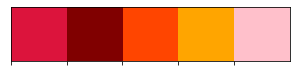

In [23]:
sns.palplot(sns.color_palette(reds))

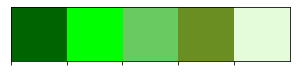

In [24]:
sns.palplot(sns.color_palette(greens))

In [25]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [26]:
fplot=reload(fplot)

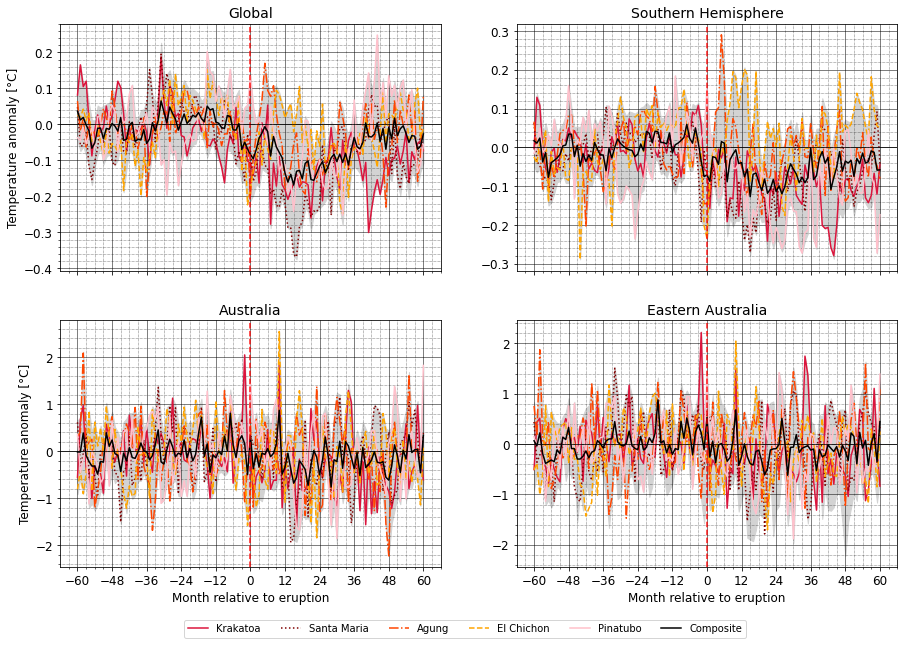

In [27]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.tmp, V_composite_mmm_Glob.tmp, p10_Glob.tmp, p90_Glob.tmp, reds, ax = axes[0,0])
fplot.SEA_plots(composite_mmm_SH.tmp, V_composite_mmm_SH.tmp, p10_SH.tmp, p90_SH.tmp, reds, ax = axes[0,1])
fplot.SEA_plots(composite_mmm_Aus.tmp, V_composite_mmm_Aus.tmp, p10_Aus.tmp, p90_Aus.tmp, reds, ax = axes[1,0])
fplot.SEA_plots(composite_mmm_EA.tmp, V_composite_mmm_EA.tmp, p10_EA.tmp, p90_EA.tmp, reds, ax = axes[1,1])

# set axis labels and subplot titles
axes[0,0].set(ylabel = f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')

handles, labels = axes[1, 1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=6) 

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('R_SEA_mon_tmp.pdf', dpi=300, bbox_inches='tight')

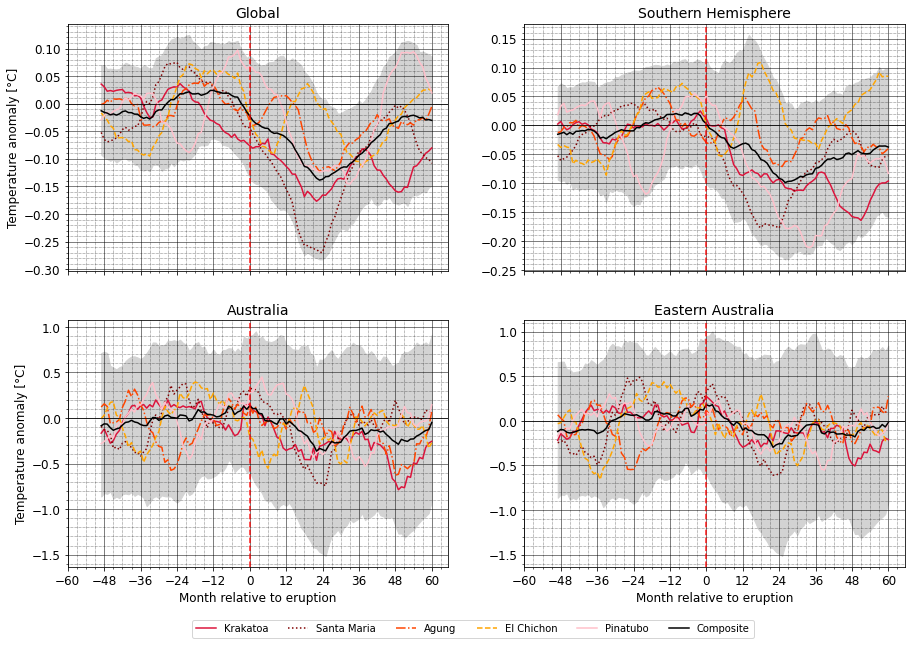

In [28]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob_roll12.tmp, V_composite_mmm_Glob_roll12.tmp, p10_Glob_roll12.tmp, p90_Glob_roll12.tmp, reds, ax = axes[0,0])
fplot.SEA_plots(composite_mmm_SH_roll12.tmp, V_composite_mmm_SH_roll12.tmp, p10_SH_roll12.tmp, p90_SH_roll12.tmp, reds, ax = axes[0,1])
fplot.SEA_plots(composite_mmm_Aus_roll12.tmp, V_composite_mmm_Aus_roll12.tmp, p10_Aus_roll12.tmp, p90_Aus_roll12.tmp, reds, ax = axes[1,0])
fplot.SEA_plots(composite_mmm_EA_roll12.tmp, V_composite_mmm_EA_roll12.tmp, p10_EA_roll12.tmp, p90_EA_roll12.tmp, reds, ax = axes[1,1])

# set axis labels and subplot titles
axes[0,0].set(ylabel = f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')

handles, labels = axes[1, 1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=6) 

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('R_SEA_mon_tmp_roll12.pdf', dpi=300, bbox_inches='tight')

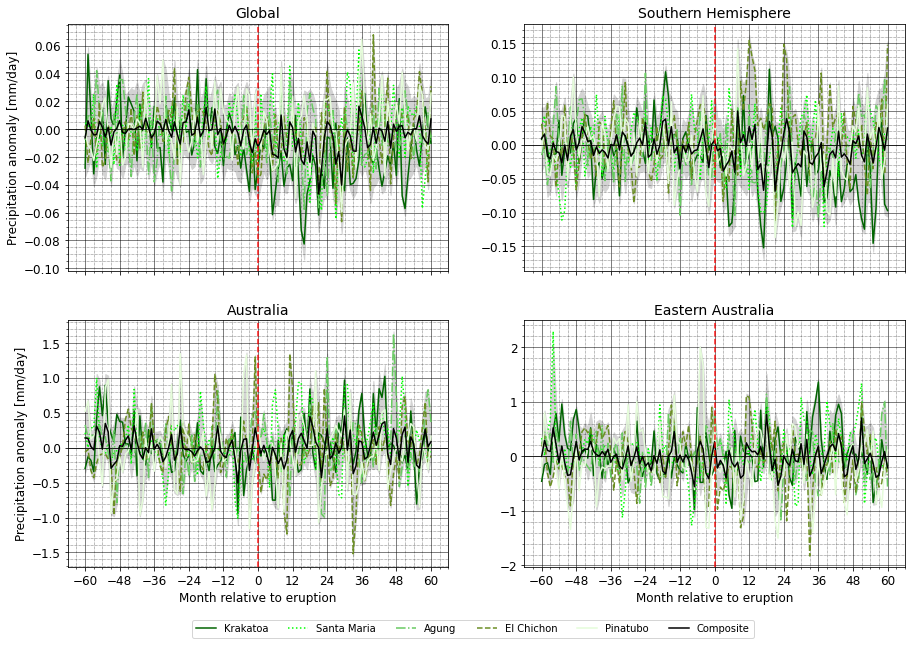

In [29]:
# plot monthly anomalies of precipitation as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.pr, V_composite_mmm_Glob.pr, p10_Glob.pr, p90_Glob.pr, greens, ax = axes[0,0])
fplot.SEA_plots(composite_mmm_SH.pr, V_composite_mmm_SH.pr, p10_SH.pr, p90_SH.pr, greens, ax = axes[0,1])
fplot.SEA_plots(composite_mmm_Aus.pr, V_composite_mmm_Aus.pr, p10_Aus.pr, p90_Aus.pr, greens, ax = axes[1,0])
fplot.SEA_plots(composite_mmm_EA.pr, V_composite_mmm_EA.pr, p10_EA.pr, p90_EA.pr, greens, ax = axes[1,1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0,0].set(ylabel = 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(ylabel = 'Precipitation anomaly [mm/day]', xlabel = 'Month relative to eruption', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')


handles, labels = axes[1, 1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=6) 

#fig.suptitle('Superposed epoch analysis of precipitation anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('R_SEA_mon_pr.pdf', dpi=300, bbox_inches='tight')

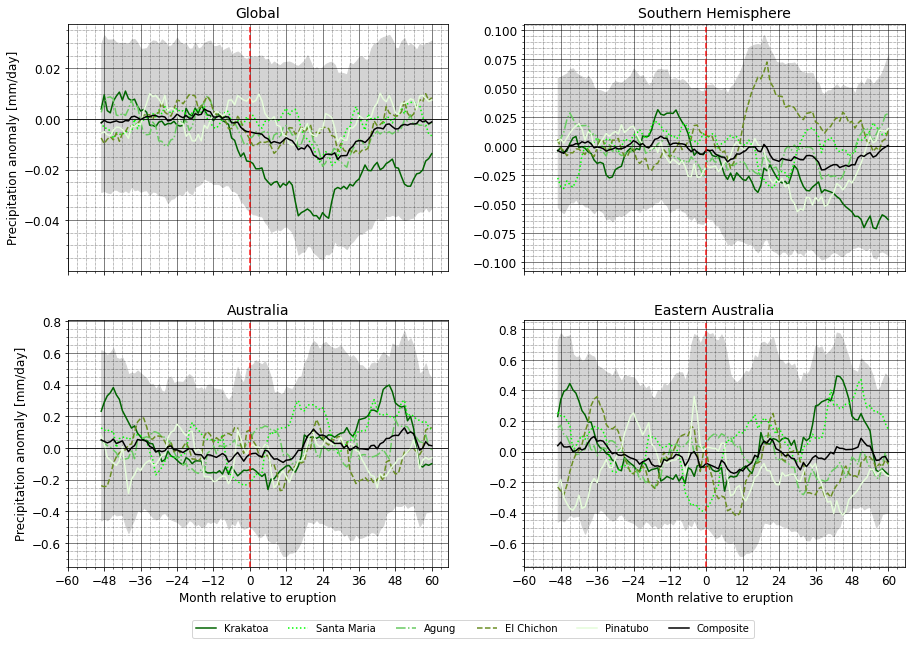

In [30]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,10))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob_roll12.pr, V_composite_mmm_Glob_roll12.pr, p10_Glob_roll12.pr, p90_Glob_roll12.pr, greens, ax = axes[0,0])
fplot.SEA_plots(composite_mmm_SH_roll12.pr, V_composite_mmm_SH_roll12.pr, p10_SH_roll12.pr, p90_SH_roll12.pr, greens, ax = axes[0,1])
fplot.SEA_plots(composite_mmm_Aus_roll12.pr, V_composite_mmm_Aus_roll12.pr, p10_Aus_roll12.pr, p90_Aus_roll12.pr, greens, ax = axes[1,0])
fplot.SEA_plots(composite_mmm_EA_roll12.pr, V_composite_mmm_EA_roll12.pr, p10_EA_roll12.pr, p90_EA_roll12.pr, greens, ax = axes[1,1])

# set axis labels and subplot titles
axes[0,0].set(ylabel = f'Precipitation anomaly [mm/day]', title = 'Global') 
axes[0,1].set(title = 'Southern Hemisphere')
axes[1,0].set(xlabel = 'Month relative to eruption', ylabel = f'Precipitation anomaly [mm/day]', title = 'Australia')
axes[1,1].set(xlabel = 'Month relative to eruption', title = 'Eastern Australia')

handles, labels = axes[1, 1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), ncol=6) 

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

plt.savefig('R_SEA_mon_pr_roll12.pdf', dpi=300, bbox_inches='tight')

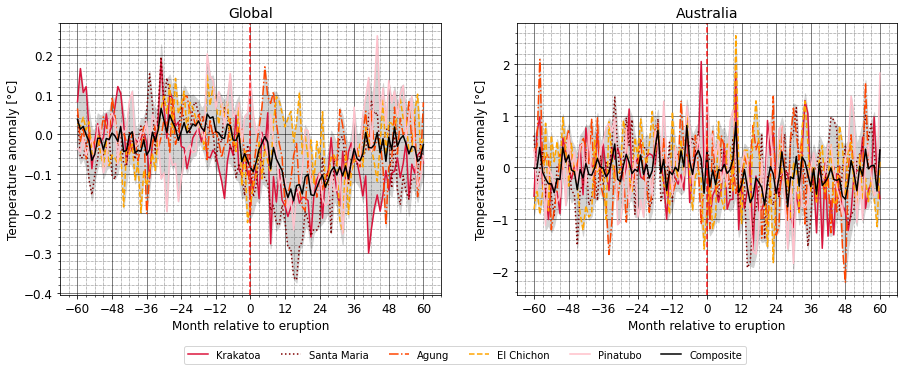

In [64]:
# plot monthly anomalies of temperature as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.tmp, V_composite_mmm_Glob.tmp, p10_Glob.tmp, p90_Glob.tmp, reds, ax = axes[0])
fplot.SEA_plots(composite_mmm_Aus.tmp, V_composite_mmm_Aus.tmp, p10_Aus.tmp, p90_Aus.tmp, reds, ax = axes[1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Global') 
axes[1].set(xlabel = 'Month relative to eruption', ylabel = f'Temperature anomaly [{deg}C]', title = 'Australia')

handles, labels = axes[1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=6) 

#fig.suptitle('Superposed epoch analysis of temperature anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

# plt.savefig('R_SEA_Glob&Aus_tas.png', dpi=300, bbox_inches='tight')

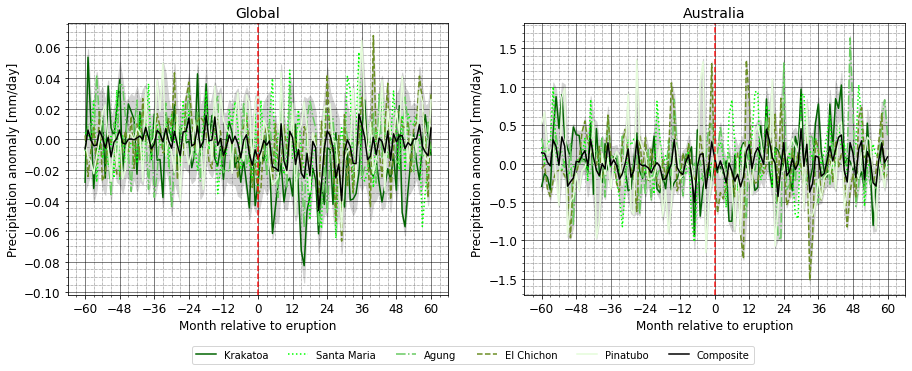

In [65]:
# plot monthly anomalies of precipitation as a superposed epoch analysis of all 5 eruptions plus composite
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))

# make subplots for each region
fplot.SEA_plots(composite_mmm_Glob.pr, V_composite_mmm_Glob.pr, p10_Glob.pr, p90_Glob.pr, greens, ax = axes[0])
fplot.SEA_plots(composite_mmm_Aus.pr, V_composite_mmm_Aus.pr, p10_Aus.pr, p90_Aus.pr, greens, ax = axes[1])

#axes[0,0].set_xticks(np.arange(min(composite_mmm_Glob.time), max(composite_mmm_Glob.time)+1, 12))

# set axis labels and subplot titles
axes[0].set(xlabel = 'Month relative to eruption', ylabel = 'Precipitation anomaly [mm/day]', title = 'Global') 
axes[1].set(xlabel = 'Month relative to eruption', ylabel = 'Precipitation anomaly [mm/day]', title = 'Australia')

handles, labels = axes[1].get_legend_handles_labels()

# first arg to bbox is x second is y (x,y)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=6) 

#fig.suptitle('Superposed epoch analysis of precipitation anomalies for 5 major eruptions', size=16)

#fig.tight_layout() # if I include this line then titles overlap

# plt.savefig('R_SEA_Glob&Aus_pr.png', dpi=300, bbox_inches='tight')